In [33]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
np.random.seed(42)

from scipy import stats 

# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rcParams['font.size'] = 16

import seaborn as sns

from IPython.core.pylabtools import figsize

from scipy.stats import percentileofscore

In [43]:
# Linear Regression and Random Forest for Comparison
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

In [44]:
# Read in class scores
df = pd.read_csv('data/student-mat.csv')

# Filter out grades that were 0
df = df[df['G3'] != 0]

df = df.rename(columns={'G3': 'Score'})

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Score
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [45]:
df['Score'].describe()

count    634.000000
mean      12.187697
std        2.691824
min        1.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: Score, dtype: float64

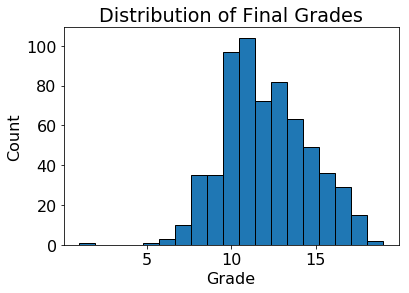

In [46]:
plt.hist(df['Score'], fill = 'navy', bins=19, edgecolor = 'k')
plt.xlabel('Grade'); plt.ylabel('Count'); plt.title('Distribution of Final Grades');

In [47]:
df['percentile'] = df['Score'].apply(lambda x: percentileofscore(df['Score'], x))

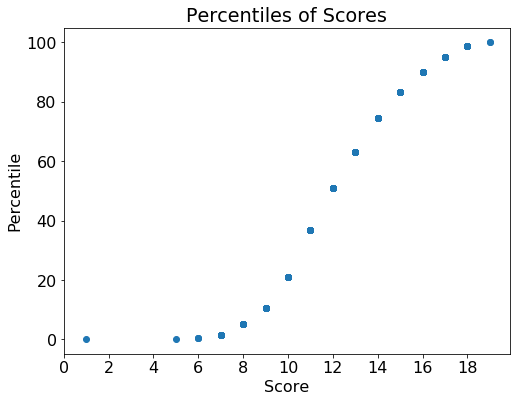

In [48]:
plt.figure(figsize = (8, 6))
plt.plot(df['Score'], df['percentile'], 'o')
plt.xticks(range(0, 20, 2), range(0, 20, 2))
plt.xlabel('Score'); plt.ylabel('Percentile'); plt.title('Percentiles of Scores');

# Find Most Correlated Variables with Final Grade

In [49]:
def format_data(df):
    # Targets are final grade of student
    labels = df['Score']
    # Drop the school and the grades from features
    df = df.drop(columns=['school', 'G1', 'G2', 'Score', 'percentile'])
    
    # One-Hot Encoding of Categorical Variables
    df = pd.get_dummies(df)
    
    df['y'] = list(labels)
    
    most_correlated = df.corr().abs()['y'].sort_values(ascending=False)
    
    # Maintain the top 8 most correlation features with score
    most_correlated = most_correlated[:10]
    
    df = df.ix[:, most_correlated.index]
    df = df.drop(columns = 'higher_no')
    
    # Split into training/testing sets with 25% split
    X_train, X_test, y_train, y_test = train_test_split(df, labels, 
                                                        test_size = 0.25,
                                                        random_state=42)
    
    return X_train, X_test, y_train, y_test

In [64]:
X_train, X_test, y_train, y_test = format_data(df)
X_train.head()

,y,failures,higher_yes,Medu,studytime,Dalc,Fedu,absences,reason_reputation
619,13,0,1,3,2,1,3,6,0
596,18,0,1,4,2,1,2,0,0
550,13,0,1,2,2,2,2,0,0
516,16,0,1,4,2,2,4,0,1
472,16,0,1,2,1,1,2,0,0


# Pair Plots of Variables

In [ ]:
# Function to calculate correlation coefficients
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r), size = 12,
                xy=(.1, .9), xycoords=ax.transAxes)

# Pair grid with correlation coefficients
g = sns.PairGrid(X_train, palette=["red"])
g.map_upper(plt.scatter, s=10)
g.map_diag(sns.distplot, kde=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_lower(corrfunc);

# Baseline Models

In [ ]:
def evaluate_predictions(predictions, true):
    rmse = np.sqrt(mean_squared_error(predictions, true))
    mae = mean_absolute_error(predictions, true)
    
    return rmse, mae

In [ ]:
median_pred = X_train['y'].median()
median_preds = [median_pred for _ in range(len(X_test))]
true = X_test['y']

In [ ]:
mb_rmse, mb_mae = evaluate_predictions(median_preds, true)
print('Median Baseline RMSE: {:.4f}.'.format(mb_rmse))
print('Median Baseline MAE:  {:.4f}.'.format(mb_mae))

In [ ]:
X_train.head()

In [ ]:
lm = LinearRegression()
lm.fit(X_train.iloc[:, 1:], X_train['y'])

In [ ]:
lm_pred = lm.predict(X_test.iloc[:, 1:])
lm_rmse, lm_mae = evaluate_predictions(lm_pred, true)
print('Linear Regression RMSE: {:.4f}.'.format(lm_rmse))
print('Linear Regression MAE:  {:.4f}.'.format(lm_mae))